
Author- Gautam Gogoi\
Start Date- 16th Nov-2024\
EDA and get basic understanding of data for the Kaggle competition - \
https://www.kaggle.com/competitions/child-mind-institute-problematic-internet-use/overview



In [1]:
import numpy as np 
import pandas as pd


In [2]:
df = pd.read_csv('C:\\Users\\gogoig\\Kaggle\\child-mind-institute-problematic-internet-use\\train.csv')
print(df.head())
print(df.info())

         id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  PCIAT-PCIAT_18  PCIAT-PCIAT_19  PCIAT

In [4]:
df.loc[:,'sii']=df.sii.fillna(-1)
df.sii.value_counts()

 0.0    1594
-1.0    1224
 1.0     730
 2.0     378
 3.0      34
Name: sii, dtype: int64

Spring    1127
Winter     997
Summer     970
Fall       866
Name: Basic_Demos-Enroll_Season, dtype: int64
Index(['Fall', 'Spring', 'Summer', 'Winter', 'Total'], dtype='object', name='Basic_Demos-Enroll_Season')


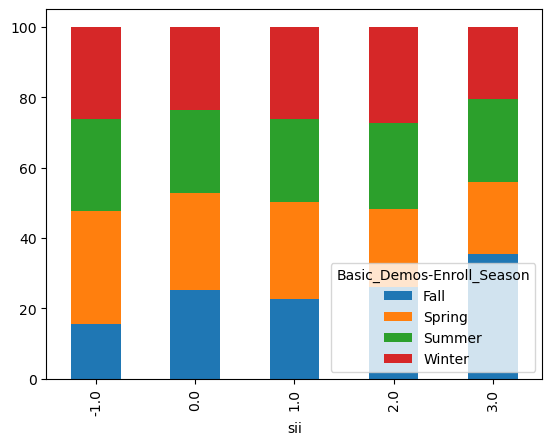

In [5]:
def categorical_var_eda (var_for_eda):
    #var_for_eda='Basic_Demos-Enroll_Season'
    print(df[var_for_eda].fillna(999).value_counts())
    df_plot= df.groupby(['sii',var_for_eda])['id'].count().unstack(var_for_eda)
    df_plot['Total']=df_plot.apply(sum,axis=1)

    plot_columns= df_plot.columns
    len_plot_columns= len(plot_columns)
    print(plot_columns)
    for i in plot_columns[0:len_plot_columns-1]:
        df_plot[i]=100*df_plot[i]/df_plot['Total']

    df_plot.iloc[:,0:len_plot_columns-1].plot(kind='bar', stacked=True)

categorical_var_eda('Basic_Demos-Enroll_Season')

EDA for Variable -  Basic_Demos-Age
-------------------
Breakup of Nulls
False    3960
Name: Basic_Demos-Age, dtype: int64
       count       mean       std   min   25%   50%   75%   max
sii                                                            
-1.0  1224.0  10.869281  3.848425   5.0   8.0  10.0  13.0  22.0
 0.0  1594.0   9.254705  3.126200   5.0   7.0   9.0  11.0  21.0
 1.0   730.0  11.117808  3.303959   5.0   9.0  11.0  13.0  22.0
 2.0   378.0  12.291005  3.280029   5.0  10.0  12.0  15.0  21.0
 3.0    34.0  14.676471  2.383283  11.0  13.0  14.0  16.0  21.0
MultiIndex([('Basic_Demos-Age', 'count', -1.0),
            ('Basic_Demos-Age', 'count',  0.0),
            ('Basic_Demos-Age', 'count',  1.0),
            ('Basic_Demos-Age', 'count',  2.0),
            ('Basic_Demos-Age', 'count',  3.0),
            (          'Total',      '',   '')],
           names=[None, None, 'sii'])


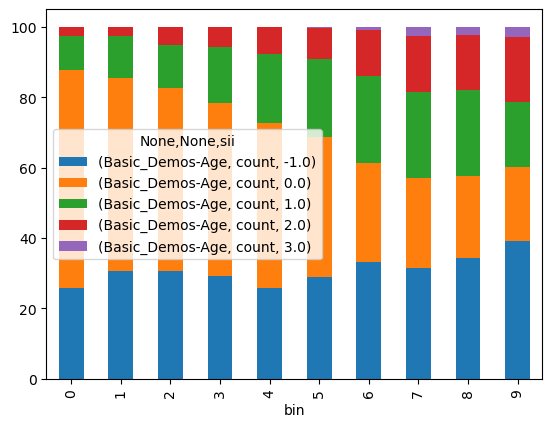

In [6]:
def numeric_var_eda(var_for_eda_numeric):
    print ("EDA for Variable - ", var_for_eda_numeric)
    print ("-------------------")
    print ("Breakup of Nulls")
    print (df[var_for_eda_numeric].isna().value_counts())
    print (df.groupby('sii')[var_for_eda_numeric].describe())
    df_for_var = df.loc[:,['sii',var_for_eda_numeric]]
    df_for_var['bin'] = pd.qcut(df_for_var[var_for_eda_numeric].rank(method='first'), 10, labels=False)

    df_for_var.groupby(['sii','bin'])['bin'].count().unstack('sii')
    df_groupby_res = df_for_var.groupby(['sii','bin']).agg({var_for_eda_numeric : [ 'count']}).unstack('sii').fillna(0)

    df_groupby_res['Total']=df_groupby_res.apply(sum,axis=1)

    plot_columns= df_groupby_res.columns
    len_plot_columns= len(plot_columns)
    print(plot_columns)
    for i in plot_columns[0:len_plot_columns-1]:
        df_groupby_res[i]=100*df_groupby_res[i]/df_groupby_res['Total']

    df_groupby_res.iloc[:,0:len_plot_columns-1].plot(kind='bar', stacked=True)
    df_for_var.groupby(['bin']).agg({var_for_eda_numeric : [ np.min, np.max]})

numeric_var_eda('Basic_Demos-Age')    

**Findings from EDA of variables** \
Basic_Demos-Enroll_Season- not much of a relation \
Basic_Demos-Age - sii 3 is mostly elder children. Seems a strong variable \
Basic_Demos-Sex - higher percentage of males in higher sii. Seems a strong variable \
CGAS-Season - Seems like higher missing value in Summer but otherwise not much of a relation \
CGAS-CGAS_Score - Lower score higher sii. also has outlier. Good Variable \
Physical-Season - Not much of a relation \
Physical-BMI - Higher BMI more SII,  \
Physical-Height - Taller more SII \
Physical-Weight - Higher Physical Weight more Sii, this seems to be a very imp variable \ 
Physical-Waist_Circumference - important variable and will be correlated with weight \
Physical-Diastolic_BP - Not much corelation \ 
Physical-HeartRate - weak variable but some corelation \ 
Physical-Systolic_BP - SII 3 have higher BP \ 
Fitness_Endurance-Season - no SII3 for Fall  \
Fitness_Endurance-Max_Stage - Mixed and lot of Nulls \ 
Fitness_Endurance-Time_Mins - Very small sii3 count, results seem to be noise for sii 3 \ 
Fitness_Endurance-Time_Sec - similar as mins \
FGC-Season- little higher sii 3 on spring but not much of a pattern otherwise \
FGC-FGC_CU- Strong variable with larger the value of Cu , higher the sii \
FGC-FGC_CU_Zone - Sii Null has different Distribution \
FGC-FGC_GSND - intermediately strong variable \
FGC-FGC_GSND_Zone - no trend \
FGC-FGC_GSD - intermediately strong variable\
FGC-FGC_GSD_Zone - no obvious trend\
FGC-FGC_PU_Zone - no obvious trend\
FGC-FGC_PU -  intermediate Var\
FGC-FGC_SRL - no obvious trend\
FGC-FGC_SRL_Zone - Increasing Trend , good var\
FGC-FGC_SRR - No obvious Trend\
FGC-FGC_SRR_Zone - Increasing Trend , good var\
FGC-FGC_TL - No Trend\
FGC-FGC_TL_Zone- Increasing Trend , good var\
BIA-Season - Seems Mixed\
BIA-BIA_Activity_Level_num - Higher level seems to be higher Sii\
BIA-BIA_BMC- Outlier and strong var has high Sii
BIA-BIA_BMI- Strong var \ 
BIA-BIA_BMR - Strong Var \
BIA-BIA_DEE - Strong Var\ 
BIA-BIA_ECW- Strong Var \ 
BIA-BIA_FFM - Strong Var   - Outliers \
BIA-BIA_FFMI  Strong Var   - Outliers \
BIA-BIA_FMI - Strong Var   - Outliers \ 
BIA-BIA_Fat - Strong Var   \
BIA-BIA_Frame_num- large frame has higher sii- seems strong \
BIA-BIA_ICW - Strong var \
BIA-BIA_LDM - Strong var - Outliers \
BIA-BIA_LST- Strong var - Outliers \
BIA-BIA_SMM - Strong var - Outliers \
BIA-BIA_TBW - Strong var - Outliers \
PAQ_A-Season- Too Many Nulls \ 
PAQ_C-Season - Many Nulls \
PAQ_A-PAQ_A_Total - Too Many Nulls \
PAQ_C-PAQ_C_Total - No Trend and Nulls \
PCIAT-Season - Mixed \
PCIAT-PCIAT_01 to PCIAT-PCIAT_20- Very Strong Var \
PCIAT-PCIAT_Total - Very Strong \
SDS-Season- no trend \ 
SDS-SDS_Total_Raw - intermediate Var \ 
SDS-SDS_Total_T - Strong Var \ 
PreInt_EduHx-Season- no trend \ 
PreInt_EduHx-computerinternet_hoursday - Intermediate to strong var \ 


EDA for Variable -  PCIAT-PCIAT_20
-------------------
Breakup of Nulls
False    2733
True     1227
Name: PCIAT-PCIAT_20, dtype: int64
       count      mean       std  min  25%  50%  75%  max
sii                                                      
-1.0     0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN
 0.0  1593.0  0.359699  0.570909  0.0  0.0  0.0  1.0  5.0
 1.0   729.0  1.249657  0.932150  0.0  1.0  1.0  2.0  5.0
 2.0   377.0  2.506631  1.385941  0.0  1.0  2.0  4.0  5.0
 3.0    34.0  4.411765  0.856973  2.0  4.0  5.0  5.0  5.0
MultiIndex([('PCIAT-PCIAT_20', 'count', 0.0),
            ('PCIAT-PCIAT_20', 'count', 1.0),
            ('PCIAT-PCIAT_20', 'count', 2.0),
            ('PCIAT-PCIAT_20', 'count', 3.0),
            (         'Total',      '',  '')],
           names=[None, None, 'sii'])


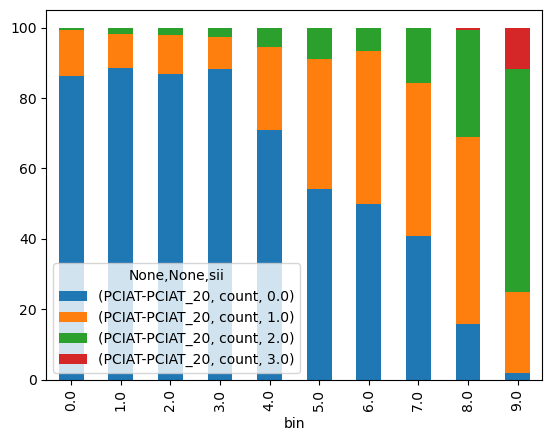

Press Enter to continue...


In [30]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

#var_name= ['FGC-FGC_CU_Zone', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU_Zone', 
#           'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone','FGC-FGC_TL_Zone'] 
#var_name = ['FGC-FGC_CU', 'FGC-FGC_GSND', 'FGC-FGC_GSD', 'FGC-FGC_PU', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_TL']
#var_name = ['BIA-BIA_BMC', 	'BIA-BIA_BMI', 	'BIA-BIA_BMR', 	'BIA-BIA_DEE', 	'BIA-BIA_ECW', 	'BIA-BIA_FFM', 	'BIA-BIA_FFMI', 
#            'BIA-BIA_FMI', 	'BIA-BIA_Fat']

#var_name= ['BIA-BIA_ICW', 	'BIA-BIA_LDM', 	'BIA-BIA_LST', 	'BIA-BIA_SMM', 	'BIA-BIA_TBW']
var_name =['PCIAT-PCIAT_01', 	'PCIAT-PCIAT_02', 	'PCIAT-PCIAT_03', 	'PCIAT-PCIAT_04', 	'PCIAT-PCIAT_05',
           'PCIAT-PCIAT_06', 	'PCIAT-PCIAT_07', 	'PCIAT-PCIAT_08', 	'PCIAT-PCIAT_09', 	'PCIAT-PCIAT_10',
           'PCIAT-PCIAT_11', 	'PCIAT-PCIAT_12', 	'PCIAT-PCIAT_13', 	'PCIAT-PCIAT_14', 	'PCIAT-PCIAT_15',
           'PCIAT-PCIAT_16', 	'PCIAT-PCIAT_17', 	'PCIAT-PCIAT_18', 	'PCIAT-PCIAT_19', 	'PCIAT-PCIAT_20']



for i in var_name:
    clear_output(wait=True)
    #categorical_var_eda(i)
    numeric_var_eda(i)
    plt.show()
    input("Press Enter to continue...")
    

#numeric_var_eda('FGC-FGC_GSND_Zone')
#categorical_var_eda('FGC-FGC_CU_Zone')

EDA for Variable -  PCIAT-PCIAT_Total
-------------------
Breakup of Nulls
False    2736
True     1224
Name: PCIAT-PCIAT_Total, dtype: int64
       count       mean        std   min    25%   50%   75%   max
sii                                                              
-1.0     0.0        NaN        NaN   NaN    NaN   NaN   NaN   NaN
 0.0  1594.0  13.929737  10.331241   0.0   3.00  15.0  23.0  30.0
 1.0   730.0  38.726027   5.390029  31.0  34.00  38.0  43.0  49.0
 2.0   378.0  60.658730   7.787458  50.0  54.00  59.0  66.0  79.0
 3.0    34.0  85.911765   4.230966  80.0  81.25  87.0  89.0  93.0
MultiIndex([('PCIAT-PCIAT_Total', 'count', 0.0),
            ('PCIAT-PCIAT_Total', 'count', 1.0),
            ('PCIAT-PCIAT_Total', 'count', 2.0),
            ('PCIAT-PCIAT_Total', 'count', 3.0),
            (            'Total',      '',  '')],
           names=[None, None, 'sii'])


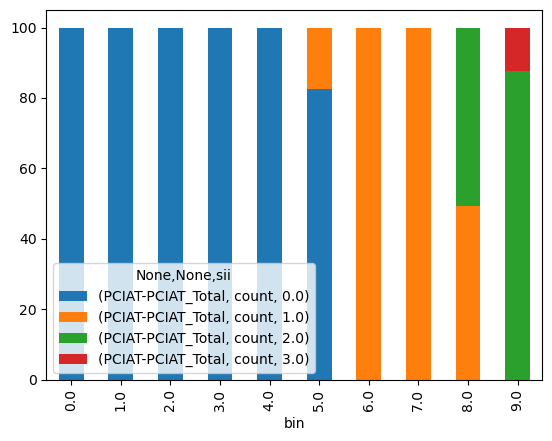

In [41]:
numeric_var_eda('PCIAT-PCIAT_Total')


Spring    985
Winter    906
Fall      828
Summer    821
999       420
Name: PreInt_EduHx-Season, dtype: int64
Index(['Fall', 'Spring', 'Summer', 'Winter', 'Total'], dtype='object', name='PreInt_EduHx-Season')


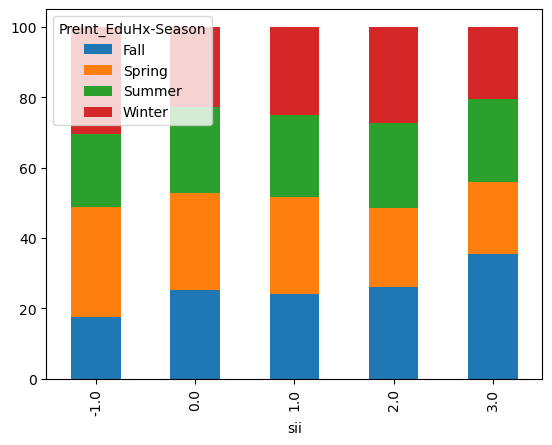

In [35]:
categorical_var_eda('PreInt_EduHx-Season')

In [40]:
pd.set_option('display.max_rows', 500)
df[df['sii']==-1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Basic_Demos-Age,1224.0,10.869281,3.848425,5.000000,8.000000,10.000000,13.000000,22.000000
Basic_Demos-Sex,1224.0,0.391340,0.488250,0.000000,0.000000,0.000000,1.000000,1.000000
CGAS-CGAS_Score,79.0,74.215190,105.922404,40.000000,58.000000,61.000000,70.000000,999.000000
Physical-BMI,495.0,20.384903,5.946798,11.915254,16.441045,18.742090,22.974717,59.132048
Physical-Height,497.0,56.199517,7.865691,33.000000,49.750000,56.000000,62.900000,77.000000
Physical-Weight,504.0,95.157440,49.919277,0.000000,58.150000,83.100000,121.850000,299.600000
Physical-Waist_Circumference,415.0,28.038795,5.850608,18.000000,24.000000,27.000000,31.000000,50.000000
Physical-Diastolic_BP,476.0,69.096639,12.637917,0.000000,61.000000,68.000000,75.000000,127.000000
Physical-HeartRate,481.0,80.428274,13.062652,48.000000,71.000000,80.000000,88.000000,116.000000
Physical-Systolic_BP,476.0,116.228992,16.196558,0.000000,108.000000,116.000000,124.000000,194.000000
